In [4]:
import geopandas as gpd
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tree_detection_framework.evaluation.evaluate import match_points, assess_matches

PLOT_BOUNDS = "/ofo-share/species-prediction-project/raw/ground-reference/ofo_ground-reference_plots.gpkg"
SHIFTS_FILE = "/ofo-share/species-prediction-project/intermediate/shifted_field_trees/shifts_per_dataset.json"
SHIFT_QUALITY_FILE = (
    "/ofo-share/scratch-david/species-tree-detection-eval/good_shifts.csv"
)
SHIFTED_TREE_FILES = Path(
    "/ofo-share/species-prediction-project/intermediate/shifted_field_trees"
)


def eval_dataset(dataset):
    tree_pred = f"/ofo-share/species-prediction-project/intermediate/detected_trees/{dataset}/tree_tops.gpkg"
    tree_gt = f"/ofo-share/species-prediction-project/intermediate/shifted_field_trees/{dataset}.gpkg"

    tree_preds = gpd.read_file(tree_pred)
    plot_bounds = gpd.read_file(PLOT_BOUNDS)
    try:
        tree_gt = gpd.read_file(tree_gt)
    except:
        print(f"Skipping {tree_gt} because it doesn't exist")
        return

    shifts = json.load(open(SHIFTS_FILE, "r"))
    # Get the particular shift for this dataset
    shift = shifts[dataset]
    # Get the bounds for this dataset
    plot = dataset[:4]
    plot_bound = plot_bounds.query("plot_id==@plot")

    tree_gt.to_crs(tree_preds.crs, inplace=True)
    plot_bound.to_crs(tree_preds.crs, inplace=True)
    # The trees used in evaluation are shifted. So we need to shift the plot bounds the corresponding amount
    plot_bound.geometry = plot_bound.translate(xoff=shift[0], yoff=shift[1])

    tree_preds = tree_preds.clip(plot_bound)

    matches = match_points(
        treetop_set_1=tree_gt,
        treetop_set_2=tree_preds,
        height_column_1="height",
        height_column_2="height",
        vis=False,
    )

    precision, recall, f1 = assess_matches(
        matches=matches, n_ground_truth=len(tree_gt), n_predictions=len(tree_preds)
    )
    print(f"precision {precision}, recall {recall}, f1 {f1}")

    return precision, recall, f1


quality_shifts = pd.read_csv(SHIFT_QUALITY_FILE)
quality_shifts = quality_shifts[quality_shifts["Unnamed: 1"] == "Good"]

results = [eval_dataset(d[:-5]) for d in quality_shifts.dataset.tolist()]

/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.4230769230769231, recall 0.5, f1 0.4583333333333333
precision 0.5079365079365079, recall 0.5245901639344263, f1 0.5161290322580645
precision 0.9090909090909091, recall 0.44776119402985076, f1 0.6
precision 0.8484848484848485, recall 0.4628099173553719, f1 0.5989304812834225
precision 0.9298245614035088, recall 0.4491525423728814, f1 0.6057142857142858
precision 0.8723404255319149, recall 0.6212121212121212, f1 0.7256637168141593
precision 0.9594594594594594, recall 0.4797297297297297, f1 0.6396396396396397
precision 0.9710144927536232, recall 0.4527027027027027, f1 0.6175115207373271


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.9215686274509803, recall 0.3643410852713178, f1 0.5222222222222221
precision 0.8888888888888888, recall 0.3669724770642202, f1 0.5194805194805195
precision 0.7903225806451613, recall 0.4188034188034188, f1 0.547486033519553
precision 0.7115384615384616, recall 0.43023255813953487, f1 0.536231884057971
precision 0.8478260869565217, recall 0.7090909090909091, f1 0.7722772277227722
precision 0.8571428571428571, recall 0.5454545454545454, f1 0.6666666666666665
precision 0.7419354838709677, recall 0.4423076923076923, f1 0.5542168674698795
precision 0.9038461538461539, recall 0.573170731707317, f1 0.7014925373134329


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.6521739130434783, recall 0.5, f1 0.5660377358490566
precision 0.6153846153846154, recall 0.75, f1 0.676056338028169
precision 0.6853932584269663, recall 0.7922077922077922, f1 0.7349397590361446
precision 0.4827586206896552, recall 0.5490196078431373, f1 0.5137614678899083
precision 0.7450980392156863, recall 0.5066666666666667, f1 0.6031746031746031
precision 0.868421052631579, recall 0.6285714285714286, f1 0.7292817679558011
precision 0.696969696969697, recall 0.5897435897435898, f1 0.638888888888889


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.62, recall 0.5299145299145299, f1 0.5714285714285714
precision 0.5277777777777778, recall 0.6785714285714286, f1 0.5937499999999999
precision 0.9264705882352942, recall 0.38650306748466257, f1 0.5454545454545454
Skipping /ofo-share/species-prediction-project/intermediate/shifted_field_trees/0031_001420_001418.gpkg because it doesn't exist
precision 0.7636363636363637, recall 0.6268656716417911, f1 0.6885245901639345
Skipping /ofo-share/species-prediction-project/intermediate/shifted_field_trees/0042_001419_001418.gpkg because it doesn't exist
precision 0.75, recall 0.6081081081081081, f1 0.6716417910447762
precision 0.8253968253968254, recall 0.4262295081967213, f1 0.5621621621621621


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.7368421052631579, recall 0.4329896907216495, f1 0.5454545454545454
precision 0.8679245283018868, recall 0.46, f1 0.6013071895424837
precision 0.8813559322033898, recall 0.52, f1 0.6540880503144655
precision 0.7380952380952381, recall 0.2627118644067797, f1 0.38750000000000007
precision 0.7487179487179487, recall 0.5637065637065637, f1 0.6431718061674009
precision 0.9069767441860465, recall 0.5379310344827586, f1 0.6753246753246752
precision 0.5806451612903226, recall 0.7128712871287128, f1 0.64


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.7283950617283951, recall 0.5175438596491229, f1 0.6051282051282051
precision 0.3650190114068441, recall 0.6857142857142857, f1 0.47642679900744417
precision 0.735632183908046, recall 0.540084388185654, f1 0.6228710462287104
precision 0.8709677419354839, recall 0.5869565217391305, f1 0.7012987012987013
Skipping /ofo-share/species-prediction-project/intermediate/shifted_field_trees/0065_000333_000335.gpkg because it doesn't exist
precision 0.8793103448275862, recall 0.68, f1 0.7669172932330827
precision 0.6468085106382979, recall 0.49032258064516127, f1 0.5577981651376147


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.6979166666666666, recall 0.432258064516129, f1 0.5338645418326693
precision 0.5866666666666667, recall 0.5866666666666667, f1 0.5866666666666667
precision 0.6753812636165577, recall 0.256198347107438, f1 0.371479928100659
Skipping /ofo-share/species-prediction-project/intermediate/shifted_field_trees/0069_000781_000780.gpkg because it doesn't exist
precision 0.658008658008658, recall 0.2512396694214876, f1 0.36363636363636365
precision 0.8711111111111111, recall 0.6468646864686468, f1 0.7424242424242424


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.8863636363636364, recall 0.6435643564356436, f1 0.7456978967495219
precision 0.8061224489795918, recall 0.6124031007751938, f1 0.696035242290749
precision 0.5464190981432361, recall 0.5322997416020672, f1 0.5392670157068062
precision 0.8555240793201133, recall 0.648068669527897, f1 0.7374847374847375
precision 0.8575498575498576, recall 0.6459227467811158, f1 0.7368421052631579
precision 0.8110236220472441, recall 0.6338461538461538, f1 0.7115716753022452


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.810126582278481, recall 0.5907692307692308, f1 0.6832740213523132
precision 0.8951965065502183, recall 0.6634304207119741, f1 0.7620817843866171
precision 0.8828828828828829, recall 0.6343042071197411, f1 0.7382297551789078
precision 0.8300395256916996, recall 0.7317073170731707, f1 0.7777777777777778
precision 0.8145161290322581, recall 0.7038327526132404, f1 0.7551401869158879
precision 0.8694158075601375, recall 0.6728723404255319, f1 0.7586206896551724


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.8637992831541219, recall 0.6409574468085106, f1 0.73587786259542
precision 0.7663934426229508, recall 0.5404624277456648, f1 0.6338983050847459
precision 0.7531380753138075, recall 0.5202312138728323, f1 0.6153846153846154
precision 0.3891977760127085, recall 0.20148026315789475, f1 0.26551070170685453


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.5178571428571429, recall 0.2815533980582524, f1 0.3647798742138365
precision 0.9807692307692307, recall 0.4722222222222222, f1 0.6375
precision 0.9333333333333333, recall 0.42424242424242425, f1 0.5833333333333333
precision 0.821917808219178, recall 0.5825242718446602, f1 0.6818181818181818
precision 0.6914893617021277, recall 0.52, f1 0.5936073059360731
precision 0.7619047619047619, recall 0.47058823529411764, f1 0.5818181818181817
precision 0.581081081081081, recall 0.5443037974683544, f1 0.562091503267974
precision 0.7582417582417582, recall 0.6216216216216216, f1 0.6831683168316832


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.7592592592592593, recall 0.5394736842105263, f1 0.6307692307692309
precision 0.8953488372093024, recall 0.7064220183486238, f1 0.7897435897435897
precision 0.9393939393939394, recall 0.8266666666666667, f1 0.8794326241134751
precision 0.8833333333333333, recall 0.803030303030303, f1 0.8412698412698413
precision 0.84, recall 0.30434782608695654, f1 0.44680851063829796
precision 0.7887323943661971, recall 0.6666666666666666, f1 0.7225806451612903
precision 0.8181818181818182, recall 0.6923076923076923, f1 0.7500000000000001
Skipping /ofo-share/species-prediction-project/intermediate/shifted_field_trees/0115_000643_000644.gpkg because it doesn't exist
Skipping /ofo-share/species-prediction-project/intermediate/shifted_field_trees/0115_000645_000743.gpkg because it doesn't exist


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.6705202312138728, recall 0.39057239057239057, f1 0.49361702127659585
precision 0.6529411764705882, recall 0.37373737373737376, f1 0.4753747323340471
Skipping /ofo-share/species-prediction-project/intermediate/shifted_field_trees/0116_000646_000647.gpkg because it doesn't exist
precision 0.6636363636363637, recall 0.3395348837209302, f1 0.44923076923076927
precision 0.88, recall 0.7096774193548387, f1 0.7857142857142856
precision 0.8252427184466019, recall 0.5120481927710844, f1 0.6319702602230484
precision 0.3684210526315789, recall 0.875, f1 0.5185185185185185
precision 0.5789473684210527, recall 0.275, f1 0.37288135593220345


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.7692307692307693, recall 0.18181818181818182, f1 0.29411764705882354
precision 0.6842105263157895, recall 0.37142857142857144, f1 0.4814814814814815
precision 0.8235294117647058, recall 0.5384615384615384, f1 0.6511627906976744
precision 0.23529411764705882, recall 0.16, f1 0.19047619047619052
precision 0.6, recall 0.5294117647058824, f1 0.5625
precision 0.5272727272727272, recall 0.46774193548387094, f1 0.4957264957264957
precision 0.8, recall 0.5714285714285714, f1 0.6666666666666666
precision 0.9, recall 0.5869565217391305, f1 0.7105263157894737


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.7619047619047619, recall 0.5925925925925926, f1 0.6666666666666666
precision 0.625, recall 0.3333333333333333, f1 0.43478260869565216
precision 0.9285714285714286, recall 0.5, f1 0.65
precision 0.7777777777777778, recall 0.6363636363636364, f1 0.7000000000000001
precision 0.3684210526315789, recall 0.4117647058823529, f1 0.3888888888888889
precision 0.7777777777777778, recall 0.25925925925925924, f1 0.3888888888888889
precision 0.8666666666666667, recall 0.35135135135135137, f1 0.5000000000000001
precision 0.8461538461538461, recall 0.44, f1 0.5789473684210525


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

precision 0.6, recall 0.1810344827586207, f1 0.2781456953642384
precision 0.55, recall 0.2558139534883721, f1 0.34920634920634924
precision 0.5897435897435898, recall 0.3333333333333333, f1 0.4259259259259259
precision 0.7692307692307693, recall 0.23809523809523808, f1 0.36363636363636365
precision 0.5263157894736842, recall 0.37037037037037035, f1 0.43478260869565216
precision 0.881578947368421, recall 0.6979166666666666, f1 0.7790697674418604
precision 0.9436619718309859, recall 0.7127659574468085, f1 0.8121212121212121
precision 0.9270833333333334, recall 0.7416666666666667, f1 0.8240740740740741
precision 0.7311827956989247, recall 0.4563758389261745, f1 0.5619834710743802
precision 0.7222222222222222, recall 0.5048543689320388, f1 0.5942857142857144
precision 0.16666666666666666, recall 0.25, f1 0.2
precision 0.38308457711442784, recall 0.1855421686746988, f1 0.25


/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/ofo-share/repos-david/conda/envs/tree-detection-framework-test-sam2/lib/python3.10/site-package

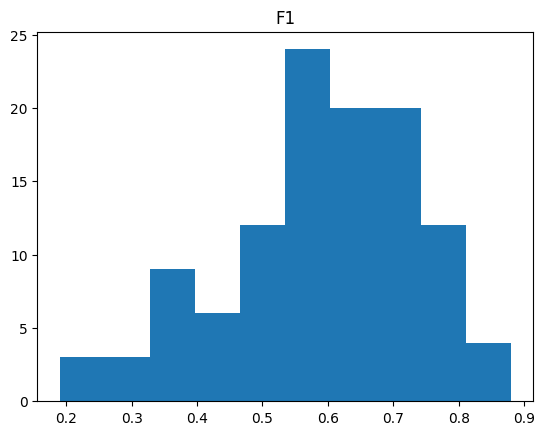

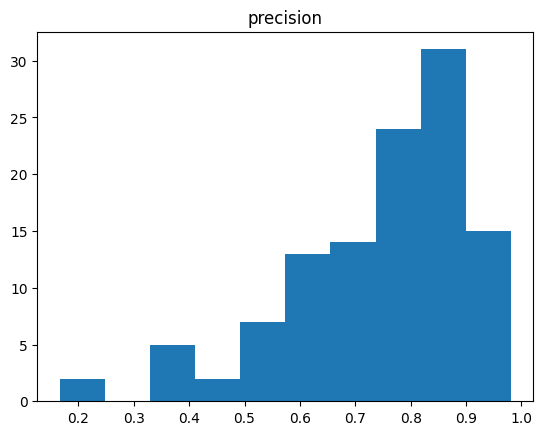

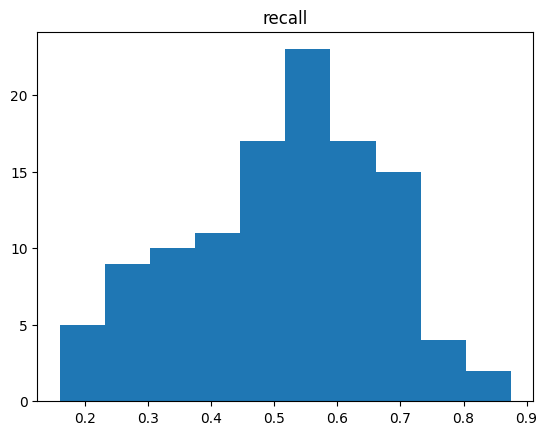

In [8]:
results = list(filter(lambda x: x is not None, results))

precision, recall, f1 = list(zip(*results))
plt.hist(f1)
plt.title("F1")
plt.show()

plt.hist(precision)
plt.title("precision")
plt.show()

plt.hist(recall)
plt.title("recall")
plt.show()